Air video

frame # 320

In [1]:
import numpy as np
import cv2
framerate = 29.18

ModuleNotFoundError: No module named 'cv2'

In [ ]:
!cd "D:/Interfacial waves resonance videos/0404"

In [61]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


vidcap = cv2.VideoCapture('air/air.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("air/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', count )
  count += 1

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Water video

In [4]:
%cd "D:Interfacial waves resonance videos/0404"

D:\Interfacial waves resonance videos\0404


In [ ]:
vidcap = cv2.VideoCapture('water.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("water/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', count )
  count += 1

Steady interface, salt:


In [ ]:
vidcap = cv2.VideoCapture('water/water.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("steady_after/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', count )
  count += 1

In [ ]:
vidcap = cv2.VideoCapture('wave/wave.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("wave/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', count )
  count += 1

In [284]:
vidcap = cv2.VideoCapture('ramp/ramp.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("ramp/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  #print('Read a new frame: ', count )
  count += 1

In [ ]:
% cd 0404/

Cutting out the relevant part

In [8]:
import cv2
#air = cv2.flip(cv2.imread("air/frame500.jpg", cv2.IMREAD_GRAYSCALE), -1)
water = cv2.flip(cv2.imread("water/frame100.jpg", cv2.IMREAD_GRAYSCALE), -1)
img = cv2.flip(cv2.imread("wave/frame500.jpg", cv2.IMREAD_GRAYSCALE), -1)

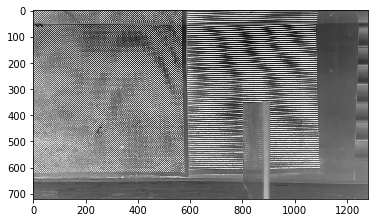

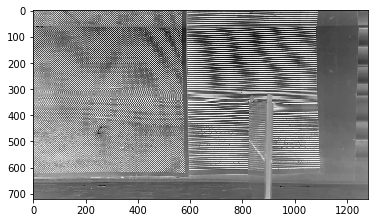

In [5]:
plt.imshow(water, cmap='Greys')
plt.show()
plt.imshow(img, cmap='Greys')

In [9]:
#img = cv2.flip(cv2.imread("wave/frame300.jpg", cv2.IMREAD_GRAYSCALE), -1)
#plt.imshow(img, cmap = 'Greys')
imgcut = img[100:600, 600:800]
refcut = water[100:600, 600:800]


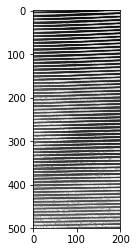

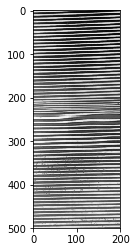

In [7]:
plt.imshow(refcut, cmap = 'Greys')
plt.show()
plt.imshow(imgcut, cmap = 'Greys')


400:600 és 1000:1200

In [ ]:
def write_frames(num):
    air = cv2.flip(cv2.imread("air/frame%s.jpg" %num, cv2.IMREAD_GRAYSCALE), -1)
    water = cv2.flip(cv2.imread("water/frame%s.jpg" %num, cv2.IMREAD_GRAYSCALE), -1)
    img = cv2.flip(cv2.imread("salt/frame%s.jpg" %num, cv2.IMREAD_GRAYSCALE), -1)
    cv2.imwrite("air.tif", air)     # save frame as JPEG file      
    cv2.imwrite("water.tif", water)
    cv2.imwrite("salt.tif", img)     # save frame as JPEG file      


In [ ]:
img = cv2.flip(cv2.imread("wave/frame5760.jpg", cv2.IMREAD_GRAYSCALE), -1)
cv2.imwrite("wave.tif", img)     # save frame as JPEG file      


In [ ]:
write_frames(400)

## Line counting

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
refref = refcut[:, 100]
imgref = imgcut[:, 100]

peaksimg, _ = find_peaks(255.-imgref, height=125)
peaks, _ = find_peaks(255.-refref, height=125)

In [11]:
from scipy.signal import find_peaks

def printMaxAmpl(img, ref, col, loc):
    img = img[100:600, loc[0]:loc[1]]
    #ref = ref[180:550, 600:700]
    cv2.equalizeHist(img)

    imgref = img[:,col]
    refref = ref[:,col]
    peaksimg, _ = find_peaks(255.-imgref, height=150)
    peaks, _ = find_peaks(255.-refref, height=150)
    shorter =  np.min([len(peaksimg), len(peaks)])
    peaksimgcut = peaksimg[:shorter]
    peakscut = peaks[:shorter]
    maxplace = np.argmax(np.abs(np.diff(np.diff(peaksimgcut)) - np.diff(np.diff(peakscut))))
    return [maxplace, np.max(np.abs(np.diff(np.diff(peaksimgcut)) - np.diff(np.diff(peakscut))))]


In [12]:
def read_file(src):
    img = cv2.flip(cv2.imread(src, cv2.IMREAD_GRAYSCALE), -1)
    return img

In [13]:
from scipy import signal
ampls = []
for i in range(0, 37558):
    #print(i)
    img = read_file("wave/frame%s.jpg" %i)
    amplsincol = []
    #for j in range(100):
    #    amplsincol.append(printMaxAmpl(img, ref,j)[1])
        #print(printMaxAmpl(img, ref,j)[1])
    #m = np.argmax(np.array(amplsincol))
    ampls.append(printMaxAmpl(img, refcut,100, [600, 800]))

In [5]:
ampls = np.loadtxt('data0404/0404_internal_wave_ampl_width.txt')

In [6]:
framerate = 29.18
def filterOnce(original):
    filtered = original.copy()
    avg = np.average(original)
    std = np.std(original)

    divs = np.abs(original-avg)> 3*std
    index = np.arange(0, len(original), 1)
    filtered[index[divs]] = filtered[index[divs]-1]
    #print(np.sum(divs))
    return filtered

def filterUntilSmooth(original):
    filtered = original.copy()
    avg = np.average(original)
    std = np.std(original)
    div = np.abs(original-avg) > 3*std
    while(np.sum(div)>0):
        filtered = filterOnce(filtered)
        avg = np.average(filtered)
        std = np.std(filtered)
        div = np.abs(filtered-avg)> 3*std
    return filtered


windowlength = 30.*framerate ## 30 sec
indeces = np.arange(0, len(ampls), 1)
startpoints = np.arange(0, len(ampls)-int(windowlength), int(windowlength))
endpoints = np.arange(int(windowlength), len(ampls), int(windowlength))


In [12]:
np.savetxt('0404_internal_wave_ampl_width.txt', ampls)

In [7]:
width = np.loadtxt('0404_internal_wave_ampl_width.txt')

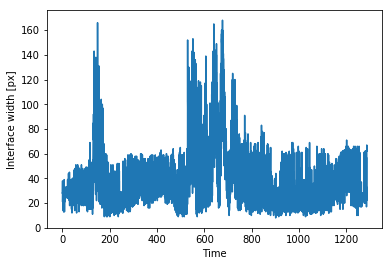

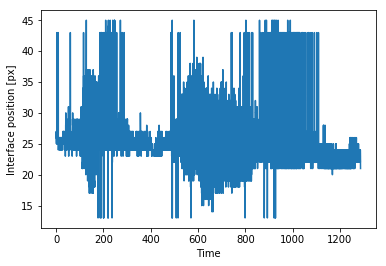

In [7]:
ampls = np.array(ampls)
plt.plot(np.arange(0, ampls.shape[0],1) /29.18, ampls[:,1])
plt.xlabel('Time')
plt.ylabel('Interface width [px]')
#plt.xlim(800, 1000)
plt.show()
plt.plot(np.arange(0, ampls.shape[0],1) /29.18, ampls[:,0])
plt.xlabel('Time')
plt.ylabel('Interface position [px]')
tr = ampls[int(800*29.18):int(1000*29.18)]

In [ ]:
plt.plot(tr)
avg = np.average(tr)
tr = np.array(tr)
div = np.abs(tr-avg)> 7
index = np.arange(0, len(tr), 1)
#div
plt.plot(index[div], tr[div], 'o')


130
32
7
11
1


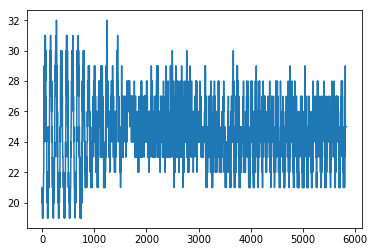

In [21]:
f = filterUntilSmooth(tr)
plt.plot(f)

In [ ]:
plt.plot(tr)

## Filtering outliers in windows of  30 sec

In [8]:
filteredAmplitudes = ampls[:,0].copy()
for i in range(len(startpoints)):
    section = ampls[:,0][startpoints[i] : endpoints[i]]
    section = filterUntilSmooth(section)
    filteredAmplitudes[startpoints[i] : endpoints[i]] = section


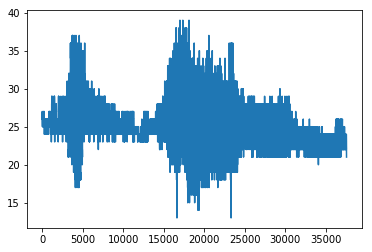

In [10]:
plt.plot(filteredAmplitudes)
ampls[:,0] = filteredAmplitudes

In [ ]:
fint, tint, Zxxint = signal.stft(ampls, 1., nperseg=70, detrend='constant')
plt.pcolormesh(tint, fint, np.abs(Zxxint))


In [ ]:
plt.plot(np.arange(0., Zxxint.shape[1], 1)[:-5]*35/29.18, np.max(Zxxint, axis=0)[:-5])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


### Time dependent FT of the driving 

In [24]:
driving = np.loadtxt('driving/driving_2.dat')

In [105]:
framerate/5.

5.836

In [104]:
1./(driving[:,0][1]-driving[:,0][0])

5.693681095782589

In [65]:
driving[:,0][-1]

1286.527933

In [89]:
tint

array([0.00000000e+00, 6.85400960e-03, 1.37080192e-02, ...,
       4.66278273e+01, 4.66346813e+01, 4.66415353e+01])

Text(0,0.5,'Frequency [Hz]')

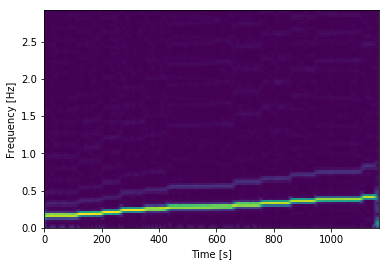

In [248]:
# from scipy import signal
fint, tint, Zxxint = signal.stft(driving[:,1], framerate/5., nperseg=200,noverlap=199, detrend='constant')
plt.pcolormesh(tint, fint, np.abs(Zxxint))
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')


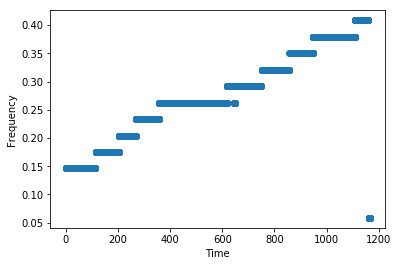

In [91]:
plt.plot(tint, fint[np.argmax(np.abs(Zxxint), axis=0)], 'o')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.show()


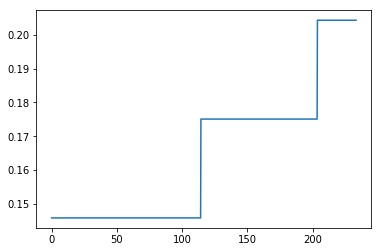

In [102]:
finetime = np.arange(6806)/framerate
plt.plot(finetime, f(finetime))

#### sync: 41 sec driving  == 45 sec wave

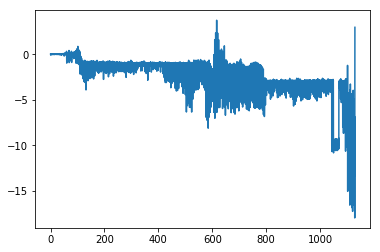

In [109]:
plt.plot(surf[:,0], surf[:,1])

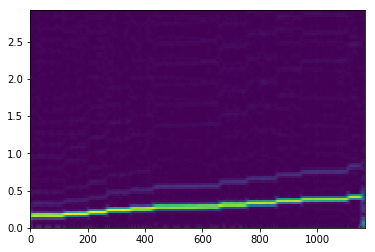

In [114]:
# from scipy import signal
fint, tint, Zxxint = signal.stft(driving[:,1], framerate/5., nperseg=200,noverlap=199, detrend='constant')
plt.pcolormesh(tint, fint, np.abs(Zxxint))


In [126]:
driv1 = np.loadtxt('driving/drving_1.dat', skiprows = 2)

In [133]:
fr = 1/(driv1[1,0]-driv1[0,0])

### The driving spectrum is measured in two blocks



- Non uniform spacing
- Joining them and interpolating 

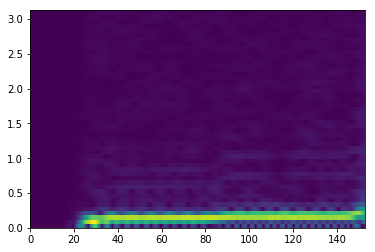

In [142]:
fdrv1, tdrv1, Zxxdrv1 = signal.stft(driv1[:,1], fr, nperseg=100,noverlap=99, detrend='constant')
plt.pcolormesh(tdrv1, fdrv1, np.abs(Zxxdrv1))


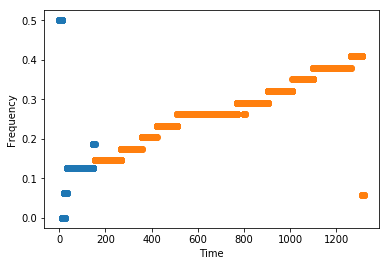

In [143]:
plt.plot(tdrv1, fdrv1[np.argmax(np.abs(Zxxdrv1), axis=0)], 'o')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.plot(driving[0,0]+tint, fint[np.argmax(np.abs(Zxxint), axis=0)], 'o')

plt.show()

In [148]:
frequencies1 = fdrv1[np.argmax(np.abs(Zxxdrv1), axis=0)]


## Joining the two spectra: 

In [159]:
times1 = tdrv1[np.logical_and(tdrv1>41, tdrv1<driving[0,0])]
freqs1 = frequencies1[np.logical_and(tdrv1>41, tdrv1<driving[0,0])]

times2 = driving[0,0]+tint
freqs2 = fint[np.argmax(np.abs(Zxxint), axis=0)]



In [175]:
timesJoined = np.hstack((times1, times2))-41.12
freqsJoined = np.hstack((freqs1, freqs2))

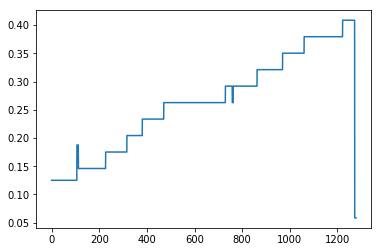

In [176]:
plt.plot(timesJoined, freqsJoined)

Generating function for interpolating between

$t_r= 41.12$ s

$t_{m} = 1319.27$ s

After, the reference is pushed to 0.

$t\in (0, 1278.15)$

In [188]:
from scipy import interpolate

drivingInterpolate = interpolate.interp1d(timesJoined, freqsJoined)

### Amplitude of the internal waves

In [181]:
twaves = np.arange(filteredAmplitudes.shape[0])/framerate


In [271]:
tsynced = twaves[twaves>45.]-twaves[twaves>45.][0]
syncedAmplitudes = filteredAmplitudes[twaves>45.]
syncedWidth =ampls[:,1][twaves>45.]

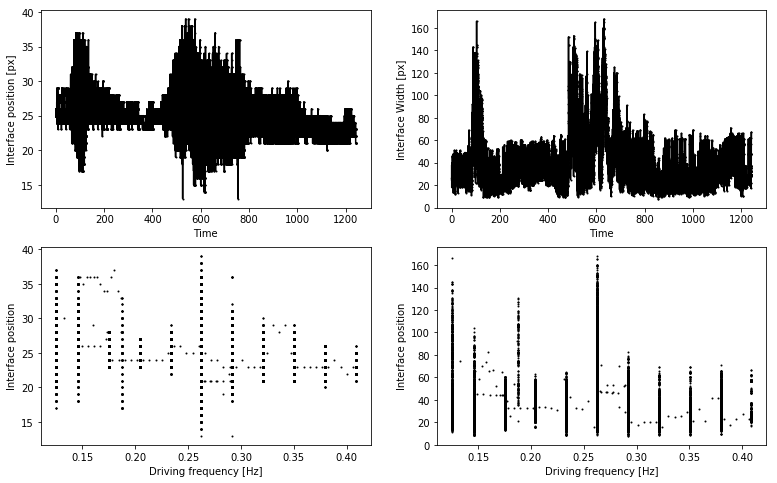

In [272]:
f, axes = plt.subplots(2, 2)
axes[0][0].plot(tsynced, syncedAmplitudes, '-o', markersize=1, c='black')
axes[0][0].set_xlabel('Time')
axes[0][0].set_ylabel('Interface position [px]')
axes[0][1].plot(tsynced, syncedWidth, '-o', markersize=1, c='black')
axes[0][1].set_xlabel('Time')
axes[0][1].set_ylabel('Interface Width [px]')

axes[1][0].plot(drivingInterpolate(tsynced), syncedAmplitudes, 'o', markersize=1, c='black')
axes[1][0].set_ylabel('Interface position')
axes[1][0].set_xlabel('Driving frequency [Hz]')

axes[1][1].plot(drivingInterpolate(tsynced), syncedWidth, 'o', markersize=1, c='black')
axes[1][1].set_ylabel('Interface position')
axes[1][1].set_xlabel('Driving frequency [Hz]')

f.set_size_inches((13, 8))

### Adding the deviation of the surface

In [209]:
surf = np.loadtxt('driving/surface_egyben.dat')


In [229]:
tsurf = surf[:,0][surf[:,0]>=41.12]-surf[:,0][surf[:,0]>=41.12][0]
surfaceAmplitude = surf[:,1][surf[:,0]>=41.12]

tsurfCUT = tsurf[tsurf<1000]
surfaceAmplitudeCUT = surfaceAmplitude[tsurf<1000]

In [232]:
tsyncedCUT = tsynced[tsynced<1000]
syncedAmplitudesCUT = syncedAmplitudes[tsynced<1000]

In [262]:
tsynced = twaves[twaves>45.]-twaves[twaves>45.][0]

syncedWidthCUT = syncedWidth[tsynced<1000]

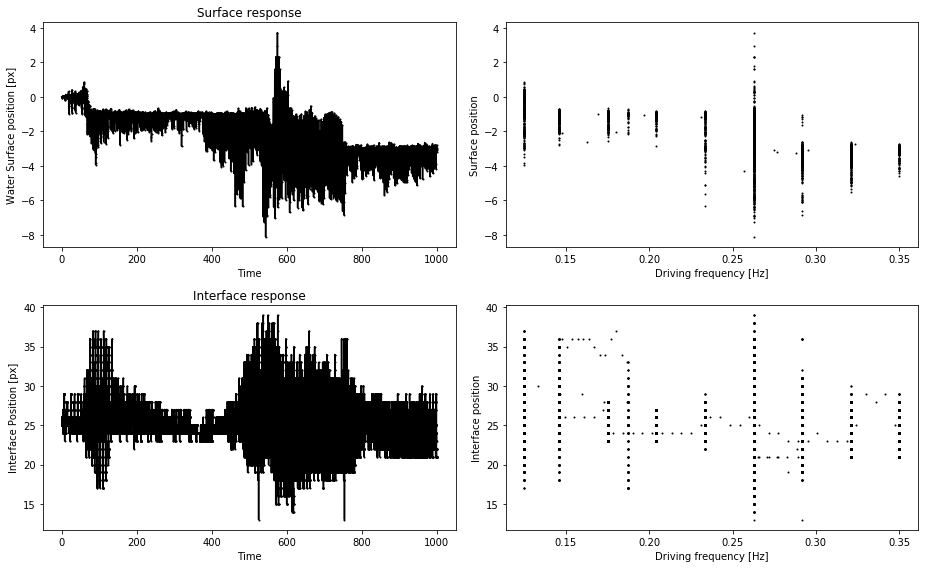

In [273]:
f, axes = plt.subplots(2, 2)
axes[0][0].plot(tsurfCUT, surfaceAmplitudeCUT, '-o', markersize=1, c='black')
axes[0][0].set_xlabel('Time')
axes[0][0].set_ylabel('Water Surface position [px]')
axes[0][0].set_title('Surface response')

axes[1][0].plot(tsyncedCUT, syncedAmplitudesCUT, '-o', markersize=1, c='black')
axes[1][0].set_xlabel('Time')
axes[1][0].set_ylabel('Interface Position [px]')
axes[1][0].set_title('Interface response')

axes[0][1].plot(drivingInterpolate(tsurfCUT), surfaceAmplitudeCUT, 'o', markersize=1, c='black')
axes[0][1].set_ylabel('Surface position')
axes[0][1].set_xlabel('Driving frequency [Hz]')

axes[1][1].plot(drivingInterpolate(tsyncedCUT), syncedAmplitudesCUT, 'o', markersize=1, c='black')
axes[1][1].set_ylabel('Interface position')
axes[1][1].set_xlabel('Driving frequency [Hz]')

f.set_size_inches((13, 8))
f.tight_layout()

### Computing relative deviations:



In [65]:
def normalize(timeseries):
    avg = np.average(timeseries)
    stdev = np.std(np.abs(timeseries))
    return (timeseries-avg)/stdev

NameError: name 'tsurfCUT' is not defined

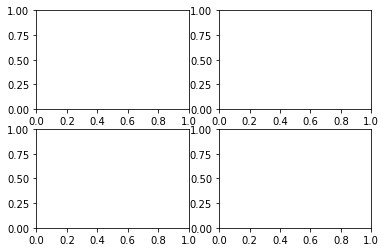

In [63]:
f, axes = plt.subplots(2, 2)
axes[0][0].plot(tsurfCUT, normalize(surfaceAmplitudeCUT), '-o', markersize=1, c='black')
axes[0][0].set_xlabel('Time')
axes[0][0].set_ylabel('Water Surface position [px]')
axes[0][0].set_title('Surface response')

axes[1][0].plot(tsyncedCUT, normalize(syncedAmplitudesCUT), '-o', markersize=1, c='black')
axes[1][0].set_xlabel('Time')
axes[1][0].set_ylabel('Interface Position [px]')
axes[1][0].set_title('Interface response')

axes[0][1].plot(drivingInterpolate(tsurfCUT), normalize(surfaceAmplitudeCUT), 'o', markersize=1, c='black')
axes[0][1].set_ylabel('Surface position')
axes[0][1].set_xlabel('Driving frequency [Hz]')

axes[1][1].plot(drivingInterpolate(tsyncedCUT), normalize(syncedAmplitudesCUT), 'o', markersize=1, c='black')
axes[1][1].set_ylabel('Interface position')
axes[1][1].set_xlabel('Driving frequency [Hz]')

f.set_size_inches((13, 8))
f.tight_layout()

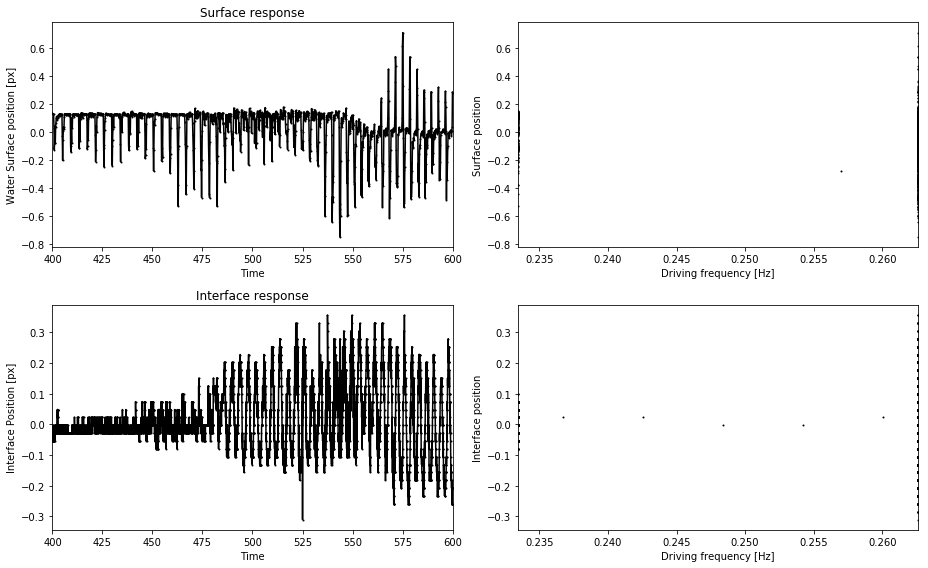

In [275]:
f, axes = plt.subplots(2, 2)
axes[0][0].plot(tsurfCUT, normalize(surfaceAmplitudeCUT), '-o', markersize=1, c='black')
axes[0][0].set_xlabel('Time')
axes[0][0].set_ylabel('Water Surface position [px]')
axes[0][0].set_title('Surface response')
axes[0][0].set_xlim(400., 600)
axes[1][0].plot(tsyncedCUT, normalize(syncedAmplitudesCUT), '-o', markersize=1, c='black')
axes[1][0].set_xlabel('Time')
axes[1][0].set_ylabel('Interface Position [px]')
axes[1][0].set_title('Interface response')
axes[1][0].set_xlim(400., 600)

axes[0][1].plot(drivingInterpolate(tsurfCUT), normalize(surfaceAmplitudeCUT), 'o', markersize=1, c='black')
axes[0][1].set_ylabel('Surface position')
axes[0][1].set_xlabel('Driving frequency [Hz]')
axes[0][1].set_xlim(drivingInterpolate(400.), drivingInterpolate(600))

axes[1][1].plot(drivingInterpolate(tsyncedCUT), normalize(syncedAmplitudesCUT), 'o', markersize=1, c='black')
axes[1][1].set_ylabel('Interface position')
axes[1][1].set_xlabel('Driving frequency [Hz]')
axes[1][1].set_xlim(drivingInterpolate(400.), drivingInterpolate(600))

f.set_size_inches((13, 8))
f.tight_layout()

## Measuring the interface response on the RIGHT side of the obstacle

<Figure size 432x288 with 0 Axes>

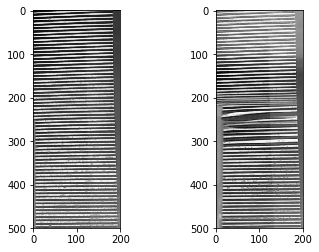

In [251]:
imgcutRight = img[100:600, 900:1100]
refcutRight = water[100:600, 900:1100]
plt.clf()
f , (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(refcutRight, cmap = 'Greys')
ax2.imshow(imgcutRight, cmap = 'Greys')


In [252]:

from scipy import signal
amplsRightside = []
for i in range(0, 37558):
    #print(i)
    img = read_file("wave/frame%s.jpg" %i)
    amplsincol = []
    #for j in range(100):
    #    amplsincol.append(printMaxAmpl(img, ref,j)[1])
        #print(printMaxAmpl(img, ref,j)[1])
    #m = np.argmax(np.array(amplsincol))
    amplsRightside.append(printMaxAmpl(img, refcutRight,100))

In [255]:
## Deteccting outliers
amplsRightside = np.array(amplsRightside)
filteredAmplitudesRight = amplsRightside[:,0].copy()
for i in range(len(startpoints)):
    section = amplsRightside[:,0][startpoints[i] : endpoints[i]]
    section = filterUntilSmooth(section)
    filteredAmplitudesRight[startpoints[i] : endpoints[i]] = section
    

In [267]:
## Syncing time scales
tsynced = twaves[np.logical_and(twaves>45.,twaves<1000.)]-twaves[twaves>45.][0]
syncedAmplitudesRight = filteredAmplitudesRight[np.logical_and(twaves>45., twaves<1000.)]
syncedWidthRight =amplsRightside[:,1][np.logical_and(twaves>45., twaves<1000.)]

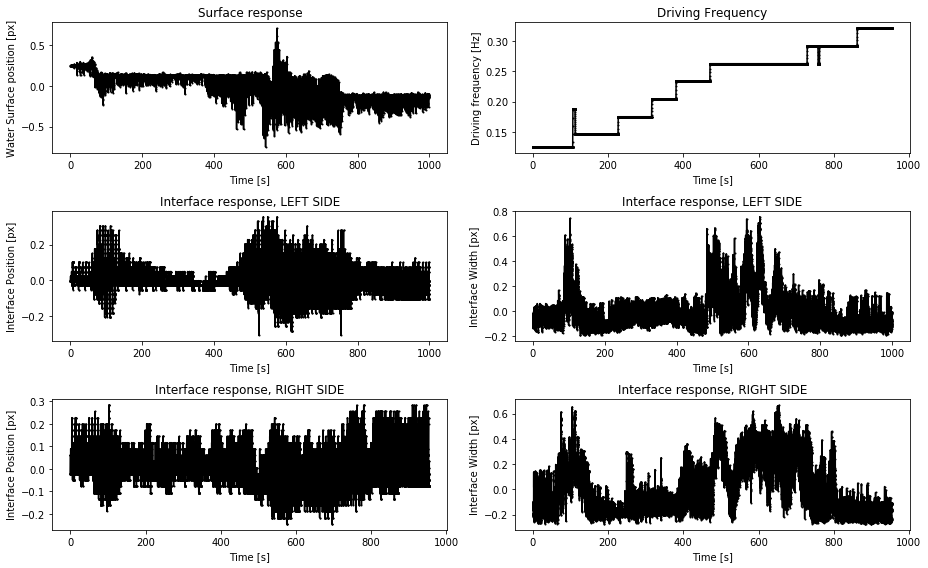

In [269]:
f, axes = plt.subplots(3, 2)
axes[0][0].plot(tsurfCUT, normalize(surfaceAmplitudeCUT), '-o', markersize=1, c='black')
axes[0][0].set_xlabel('Time [s]')
axes[0][0].set_ylabel('Water Surface position [px]')
axes[0][0].set_title('Surface response')

axes[1][0].plot(tsyncedCUT, normalize(syncedAmplitudesCUT), '-o', markersize=1, c='black')
axes[1][0].set_xlabel('Time [s]')
axes[1][0].set_ylabel('Interface Position [px]')
axes[1][0].set_title('Interface response, LEFT SIDE')


axes[2][0].plot(tsynced, normalize(syncedAmplitudesRight), '-o', markersize=1, c='black')
axes[2][0].set_xlabel('Time [s]')
axes[2][0].set_ylabel('Interface Position [px]')
axes[2][0].set_title('Interface response, RIGHT SIDE')

axes[0][1].plot(tsynced, drivingInterpolate(tsynced), '-o', markersize=1, c='black')
axes[0][1].set_xlabel('Time [s]')
axes[0][1].set_ylabel('Driving frequency [Hz]')
axes[0][1].set_title('Driving Frequency')


axes[1][1].plot(tsyncedCUT, normalize(syncedWidthCUT), '-o', markersize=1, c='black')
axes[1][1].set_xlabel('Time [s]')
axes[1][1].set_ylabel('Interface Width [px]')
axes[1][1].set_title('Interface response, LEFT SIDE')

axes[2][1].plot(tsynced, normalize(syncedWidthRight), '-o', markersize=1, c='black')
axes[2][1].set_xlabel('Time [s]')
axes[2][1].set_ylabel('Interface Width [px]')
axes[2][1].set_title('Interface response, RIGHT SIDE')


f.set_size_inches((13, 8))
f.tight_layout()

# Quick ramp, tmax = 4 minutes

TypeError: 'NoneType' object is not subscriptable

<Figure size 432x288 with 0 Axes>

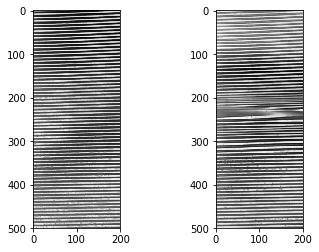

In [14]:
imgcut = img[100:600, 600:800]
refcut= water[100:600, 600:800]
plt.clf()
f , (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(refcut, cmap = 'Greys')
ax2.imshow(imgcut, cmap = 'Greys')

amplsRamp = []
for i in range(0, 37558):
    #print(i)
    img = read_file("ramp/frame%s.jpg" %i)
    amplsincol = []
    #for j in range(100):
    #    amplsincol.append(printMaxAmpl(img, ref,j)[1])
        #print(printMaxAmpl(img, ref,j)[1])
    #m = np.argmax(np.array(amplsincol))
    amplsRamp.append(printMaxAmpl(img, refcut,100, [600, 800]))

In [15]:
len(amplsRamp)

6446

In [17]:
np.savetxt("ampls_ramp_0404_.txt",amplsRamp)

In [32]:
amplsRamp= np.loadtxt("data0404/ampls_ramp_0404_.txt")

In [28]:
surfRamp = np.loadtxt('data0404/RAMP_surface.dat', skiprows = 2 )
#drivingRamp = np.loadtxt('driving/RAMP_driving.dat', skiprows =2 )

In [20]:
## Filtering
windowlength = 30.*framerate ## 30 sec
indeces = np.arange(0, len(amplsRamp), 1)
startpoints = np.arange(0, len(ampls)-int(windowlength), int(windowlength))
endpoints = np.arange(int(windowlength), len(amplsRamp), int(windowlength))


5.836


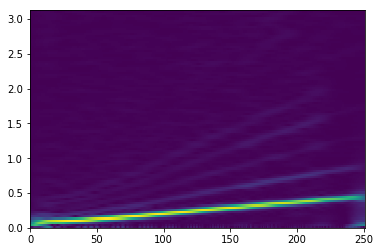

In [21]:
## Frequency spectrum
fr = drivingRamp[:,0][1] - drivingRamp[:,0][0]
print(framerate/5)
fdrvRamp, tdrvRamp, ZxxdrvRamp = signal.stft(drivingRamp[:,1], 1/fr, nperseg=200,noverlap=199, detrend='constant')
plt.pcolormesh(tdrvRamp, fdrvRamp, np.abs(ZxxdrvRamp))



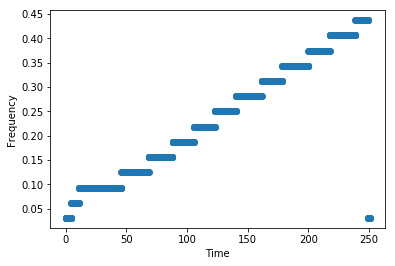

In [22]:
plt.plot(tdrvRamp, fdrvRamp[np.argmax(np.abs(ZxxdrvRamp), axis=0)], 'o')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.show()

In [23]:
freqRamp = fdrvRamp[np.argmax(np.abs(ZxxdrvRamp), axis=0)]

In [24]:
ramps = np.vstack((tdrvRamp,freqRamp))

In [25]:
np.savetxt('rampDriving_direct.txt', ramps)

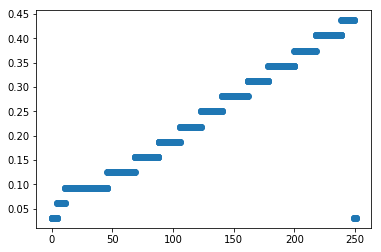

In [25]:
Driving = np.loadtxt('data0404/rampDriving_direct.txt').T
plt.plot(Driving[:,0], Driving[:,1], 'o')

In [26]:
from scipy import interpolate

drivingInterpolate = interpolate.interp1d(Driving[:,0], Driving[:,1])

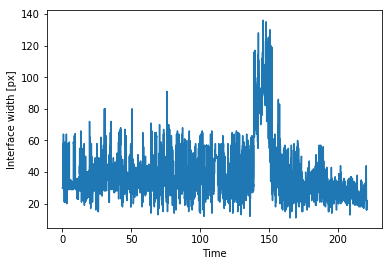

Text(0,0.5,'Interface position [px]')

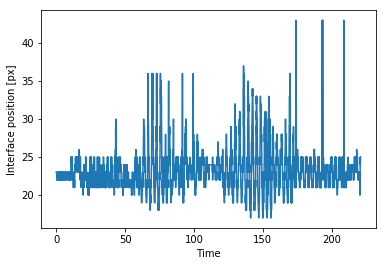

In [307]:
amplsRamp = np.array(amplsRamp)
plt.plot(np.arange(0, amplsRamp.shape[0],1) /29.18, amplsRamp[:,1])
plt.xlabel('Time')
plt.ylabel('Interface width [px]')
#plt.xlim(800, 1000)
plt.show()
plt.plot(np.arange(0, amplsRamp.shape[0],1) /29.18, amplsRamp[:,0])
plt.xlabel('Time')
plt.ylabel('Interface position [px]')


Text(0,0.5,'Surface position [px]')

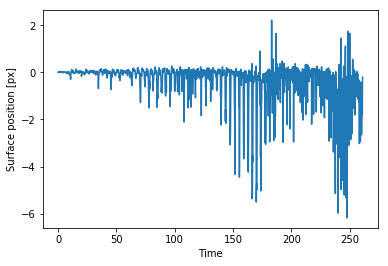

In [308]:
plt.plot(surfRamp[:,0], surfRamp[:,1])
plt.xlabel('Time')
plt.ylabel('Surface position [px]')


In [18]:
114000 + 37403 + 13500 

164903

##  Density profile



In [135]:
def cond_dens(x):
    return x**4*0.0000000000922584+x**3*(-0.0000000294733)+x**2*0.00000419348+x*0.000322098+0.999075


Text(0, 0.5, 'Depth [cm]')

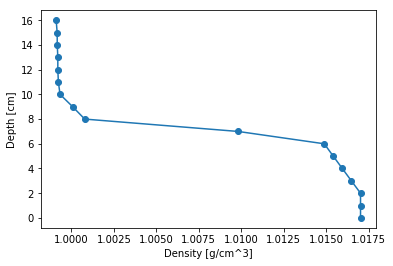

In [143]:
density = np.array([40., 40., 40., 39., 38., 37., 36., 26., 5., 3., 0.8, 0.5, 0.4, 0.4, 0.3, 0.28, 0.1])
den = np.array(density)
plt.plot(cond_dens(den), np.arange(0, 17, 1), 'o-')
plt.xlabel('Density [g/cm^3]')
plt.ylabel('Depth [cm]')

## Total Salinity: 

0.0938 g/cm^2
L = 2.26 m
d = 15 cm

In [149]:
import scipy.integrate
surface = scipy.integrate.simps(cond_dens(den)-np.min(cond_dens(den)), np.arange(0, 17, 1))
print(surface*226*15)

426.3443107742355


In [152]:
density = np.max(cond_dens(den)-np.min(cond_dens(den)))
print(density*226*15*16)

971.4995067115418


$$
c = \sqrt{\frac{g}{k}\frac{\rho_2 - \rho_1}{\rho_1 \coth (k H_1) + \rho_2 \coth (k H_2)}}
$$
Because of resonance:


$c = \frac{2 d}{T}$, $k = \frac{2\pi}{\lambda} = \frac{\pi}{d}$ 

$$
\frac{2d}{T} = \sqrt{\frac{g d}{\pi }\frac{\rho_2 - \rho_1}{\rho_1 \coth (\pi H_1/d) + \rho_2 \coth (\pi H_2/d)}}$$

$H_1$ = $H_2 = 8 $ cm, $d = 25.5$ cm

In [11]:
## Solve for d
def opt(x):
    drho = 28.
    g = 9.81
    T = 6.6
    h1 = 0.08
    h2 = 0.08
    return np.sqrt((g*x/np.pi) * drho / (1000./np.tanh(np.pi*h1 / x) + 1028./np.tanh(np.pi*h2 / x)))*T/2. - x

In [12]:
def ResonanceFrequency(d, drho, rho1):
    g = 9.81
    h1 = 0.08
    h2 = 0.08
    gdperPi = g*d/np.pi 
    rho2 = rho1 + drho
    denom = rho1/np.tanh(np.pi*h1/d) + rho2/np.tanh(np.pi*h2/d)
    rhs = np.sqrt(gdperPi*drho/denom)
    return rhs/(2*d)
    

In [13]:
drho = 15.
rho1 = 1000.


In [16]:
ds = np.arange(0.02, 0.4, 0.02)

Text(0, 0.5, 'Theoretical resonance freqency [Hz]')

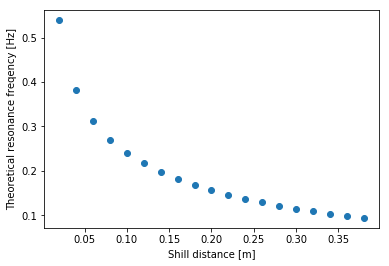

In [18]:
plt.plot(ds, ResonanceFrequency(ds, drho, rho1), 'o')
plt.xlabel('Shill distance [m]')
plt.ylabel('Theoretical resonance freqency [Hz]')

### Comparison of surface response and interface response

In [44]:
## Theoretical ResonanceFrequency is 

TheorResonance = ResonanceFrequency(0.255, drho, rho1)

In [52]:
## Theoretical resonance time: 
freqs = drivingInterpolate(np.arange(0, amplsRamp.shape[0],1) /29.18)
ResonanceTime = (np.arange(0, amplsRamp.shape[0],1) /29.18)[np.abs(freqs-TheorResonance) < 0.001]
print("Resonance Frequency: ", TheorResonance)
print("Time to reach resonance frequency: ", ResonanceTime)

Resonance Frequency:  0.13121357144275514
Time to reach resonance frequency:  [68.36874572]


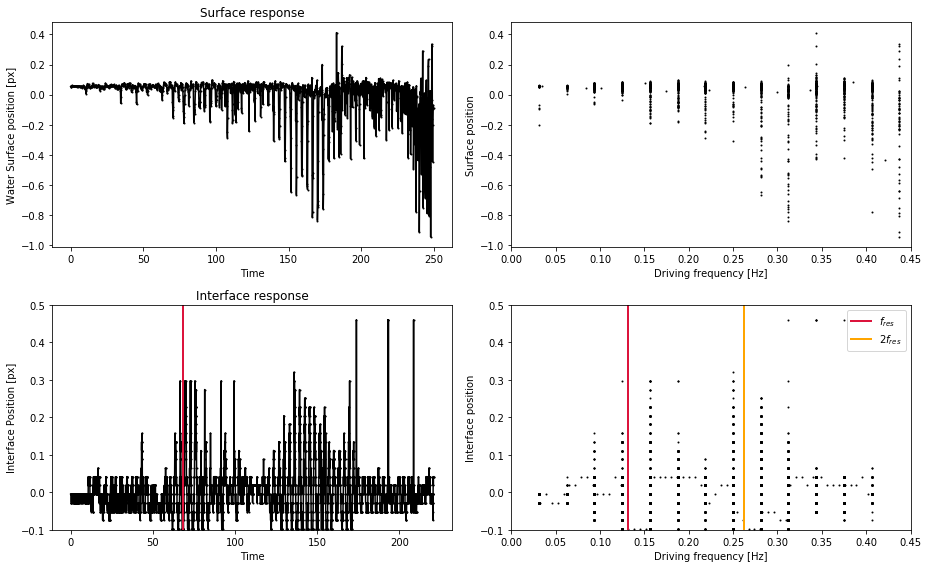

In [57]:
f, axes = plt.subplots(2, 2)
axes[0][0].plot(surfRamp[:,0][surfRamp[:,0]<250], normalize(surfRamp[:,1][surfRamp[:,0]<250]), '-o', markersize=1, c='black')
axes[0][0].set_xlabel('Time')
axes[0][0].set_ylabel('Water Surface position [px]')
axes[0][0].set_title('Surface response')

axes[1][0].plot(np.arange(0, amplsRamp.shape[0],1) /29.18 , normalize(amplsRamp[:,0]), '-o', markersize=1, c='black')
axes[1][0].set_xlabel('Time')
axes[1][0].set_ylabel('Interface Position [px]')
axes[1][0].set_ylim(-0.1, 0.5)

axes[1][0].plot([ResonanceTime, ResonanceTime],[-2., 2.], '-', linewidth = 2., c='Crimson')

axes[1][0].set_title('Interface response')

axes[0][1].plot(drivingInterpolate(surfRamp[:,0][surfRamp[:,0]<250]), normalize(surfRamp[:,1][surfRamp[:,0]<250]), 'o', markersize=1, c='black')
axes[0][1].set_ylabel('Surface position')
axes[0][1].set_xlabel('Driving frequency [Hz]')
axes[0][1].set_xlim(0., 0.45)


axes[1][1].plot(drivingInterpolate(np.arange(0, amplsRamp.shape[0],1) /29.18), normalize(amplsRamp[:,0]), 'o', markersize=1, c='black')
axes[1][1].set_ylabel('Interface position')
axes[1][1].plot([TheorResonance, TheorResonance],[-2., 2.], '-', linewidth = 2., c='Crimson', label = r'$f_{res}$')
axes[1][1].plot([2*TheorResonance, 2*TheorResonance],[-2., 2.], '-', linewidth = 2., c='Orange', label = r'$2f_{res}$')
axes[1][1].legend(loc='best')
axes[1][1].set_ylim(-0.1, 0.5)
axes[1][1].set_xlabel('Driving frequency [Hz]')
axes[1][1].set_xlim(0., 0.45)

f.set_size_inches((13, 8))
f.tight_layout()

## Interface width 

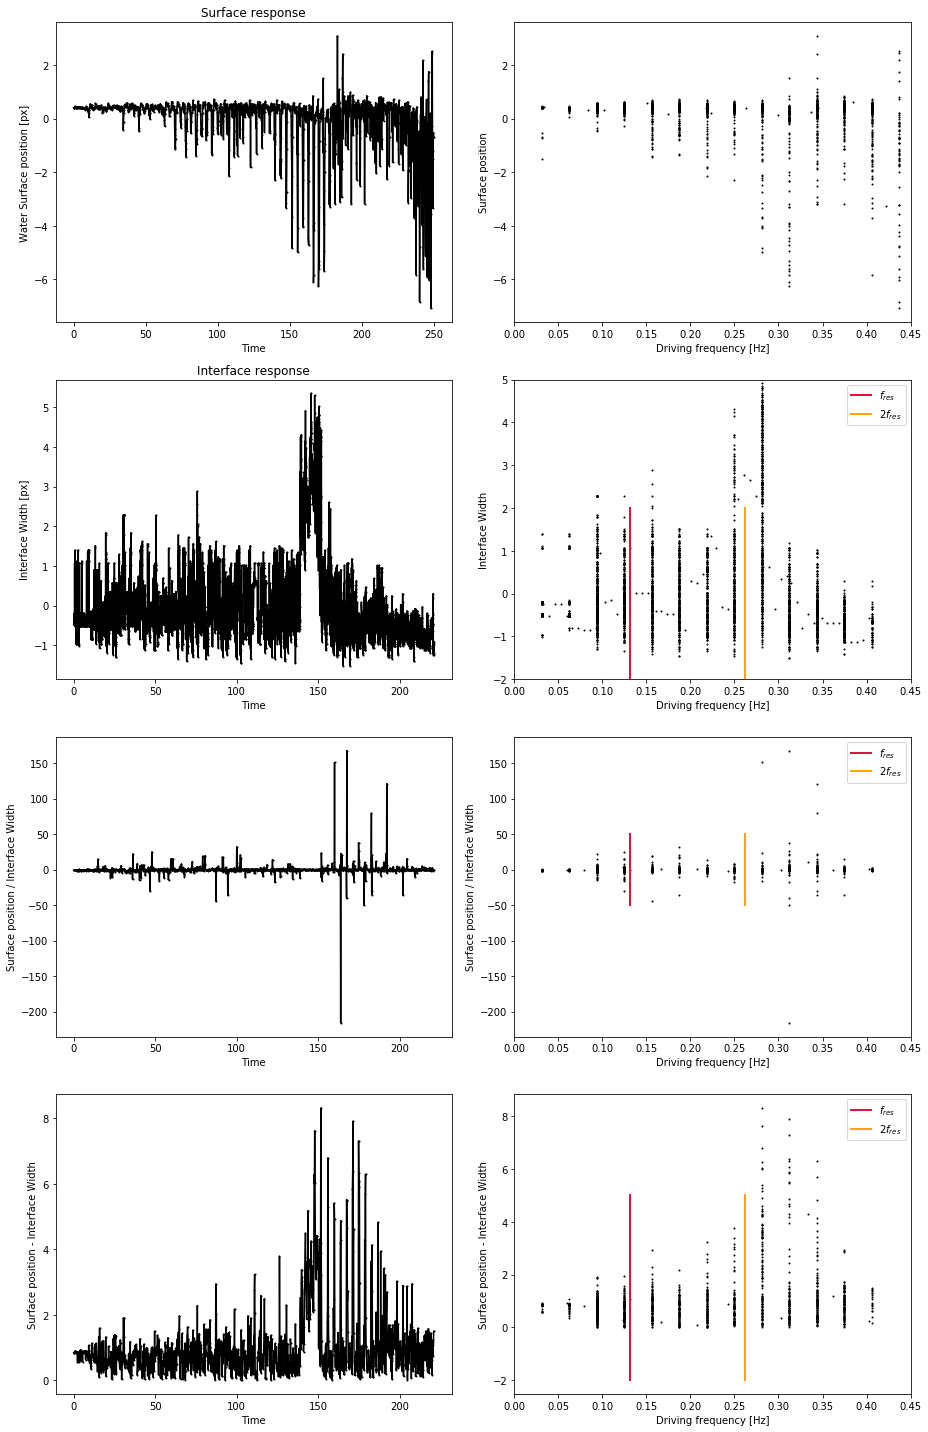

In [108]:
f, axes = plt.subplots(4, 2)
axes[0][0].plot(surfRamp[:,0][surfRamp[:,0]<250], normalize(surfRamp[:,1][surfRamp[:,0]<250]), '-o', markersize=1, c='black')
axes[0][0].set_xlabel('Time')
axes[0][0].set_ylabel('Water Surface position [px]')
axes[0][0].set_title('Surface response')

axes[1][0].plot(np.arange(0, amplsRamp.shape[0],1) /29.18 , normalize(amplsRamp[:,1]), '-o', markersize=1, c='black')
axes[1][0].set_xlabel('Time')
axes[1][0].set_ylabel('Interface Width [px]')
axes[1][0].set_title('Interface response')

axes[0][1].plot(drivingInterpolate(surfRamp[:,0][surfRamp[:,0]<250]), normalize(surfRamp[:,1][surfRamp[:,0]<250]), 'o', markersize=1, c='black')
axes[0][1].set_ylabel('Surface position')
axes[0][1].set_xlabel('Driving frequency [Hz]')
axes[0][1].set_xlim(0., 0.45)


axes[1][1].plot(drivingInterpolate(np.arange(0, amplsRamp.shape[0],1) /29.18), normalize(amplsRamp[:,1]), 'o', markersize=1, c='black')
axes[1][1].set_ylabel('Interface Width')
axes[1][1].set_xlabel('Driving frequency [Hz]')
axes[1][1].plot([TheorResonance, TheorResonance],[-2., 2.], '-', linewidth = 2., c='Crimson', label = r'$f_{res}$')
axes[1][1].plot([2*TheorResonance, 2*TheorResonance],[-2., 2.], '-', linewidth = 2., c='Orange', label = r'$2f_{res}$')
axes[1][1].legend(loc='best')
axes[1][1].set_ylim(-2., 5.)
axes[1][1].set_xlim(0., 0.45)


axes[2][0].plot(np.arange(0, amplsRamp.shape[0],5) /29.18 , normalize(surfRamp[:,1][:1290])/normalize(amplsRamp[:,1][::5]), '-o', markersize=1, c='black')
axes[2][0].set_xlabel('Time')
axes[2][0].set_ylabel('Surface position / Interface Width')


axes[2][1].plot(drivingInterpolate(np.arange(0, amplsRamp.shape[0],5) /29.18), normalize(surfRamp[:,1][:1290])/normalize(amplsRamp[:,1][::5]), 'o', markersize=1, c='black')
axes[2][1].set_ylabel('Surface position / Interface Width')
axes[2][1].set_xlabel('Driving frequency [Hz]')
axes[2][1].plot([TheorResonance, TheorResonance],[-50., 50.], '-', linewidth = 2., c='Crimson', label = r'$f_{res}$')
axes[2][1].plot([2*TheorResonance, 2*TheorResonance],[-50., 50.], '-', linewidth = 2., c='Orange', label = r'$2f_{res}$')
axes[2][1].legend(loc='best')
axes[2][1].set_xlim(0., 0.45)

axes[3][0].plot(np.arange(0, amplsRamp.shape[0],5) /29.18 , np.abs(normalize(surfRamp[:,1][:1290])-normalize(amplsRamp[:,1][::5])), '-o', markersize=1, c='black')
axes[3][0].set_xlabel('Time')
axes[3][0].set_ylabel('Surface position - Interface Width')


axes[3][1].plot(drivingInterpolate(np.arange(0, amplsRamp.shape[0],5) /29.18), np.abs(normalize(surfRamp[:,1][:1290])-normalize(amplsRamp[:,1][::5])), 'o', markersize=1, c='black')
axes[3][1].set_ylabel('Surface position - Interface Width')
axes[3][1].set_xlabel('Driving frequency [Hz]')
axes[3][1].plot([TheorResonance, TheorResonance],[-2., 5.], '-', linewidth = 2., c='Crimson', label = r'$f_{res}$')
axes[3][1].plot([2*TheorResonance, 2*TheorResonance],[-2., 5.], '-', linewidth = 2., c='Orange', label = r'$2f_{res}$')
axes[3][1].legend(loc='best')
axes[3][1].set_xlim(0., 0.45)

f.set_size_inches((13, 20))
f.tight_layout()
plt.savefig('RelativeResponse.pdf', bbox_inches='tight')

### Instantaneous frequency

Instantaneous phase is $\Phi(t) = \omega(t)\cdot t - \frac{\pi}{2}$

$$
IF(t) = \frac{d \Phi(t)}{dt}
$$

[numerically]

Text(0, 0.5, '$\\omega(t)$')

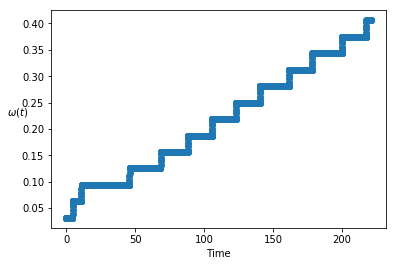

In [99]:
plt.plot(np.arange(0, amplsRamp.shape[0],1) /29.18, drivingInterpolate(np.arange(0, amplsRamp.shape[0],1) /29.18), 'o-')
plt.xlabel('Time')
plt.ylabel(r'$\omega(t)$', rotation = 0)

Text(0.5, 1.0, 'Instantaneous phase')

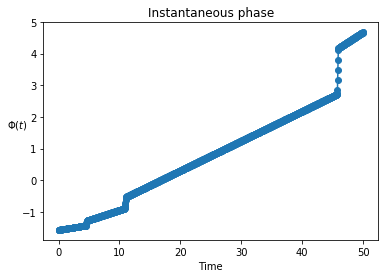

In [126]:
time = np.arange(0, amplsRamp.shape[0],1) /29.18
plt.plot(np.arange(0, amplsRamp.shape[0],1)[time<50] /29.18, drivingInterpolate(np.arange(0, amplsRamp.shape[0],1) /29.18)[time<50]*time[time<50] - np.pi/2, 'o-')
plt.xlabel('Time')
plt.ylabel(r'$\Phi(t)$', rotation = 0)
plt.title('Instantaneous phase')

Text(0.5, 1.0, 'Instantaneous phase')

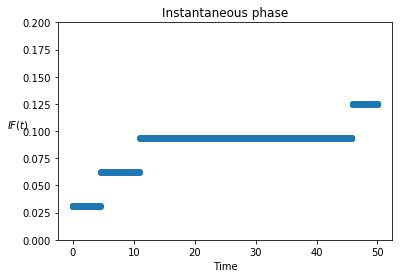

In [131]:
plt.plot(time[:-1][time[:-1]<50], np.diff(drivingInterpolate(time)*time - np.pi/2)[time[:-1]<50]/(time[1]-time[0]), 'o')
plt.xlabel('Time')
plt.ylabel(r'$IF(t)$', rotation = 0)
plt.ylim(0., 0.2)
plt.title('Instantaneous phase')

In [127]:
np.diff(drivingInterpolate(time)*time - np.pi/2)[time[:-1]<50]

array([0.00107072, 0.00107072, 0.00107072, ..., 0.00428286, 0.00428286,
       0.00428286])

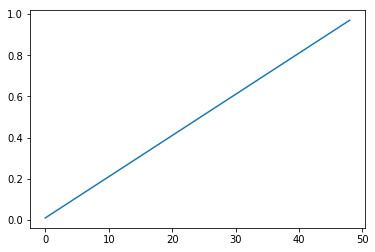

In [116]:
x = np.arange(0., 5., 0.1)**2
#plt.plot(x)
plt.plot(np.diff(x))